# Importing Libraries

In [7]:
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# Dataset Loading

In [8]:
!pip install -q xlrd
!git clone https://github.com/gja729/4375_Data.git


fatal: destination path '4375_Data' already exists and is not an empty directory.


In [9]:
!ls 4375_Data

AAPL.csv


In [10]:
apple_stocks = pd.read_csv('4375_Data/AAPL.csv')
apple_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


In [11]:
apple_stocks['Date'] = pd.to_datetime(apple_stocks['Date']) # convert date to timestamp

del apple_stocks['Adj Close'] # delete Adj Close columns

apple_stocks.set_index('Date',inplace=True) # set date column to index

data = apple_stocks.drop(columns=['Volume']) # Data without volume

volume = apple_stocks['Volume'] # Volume data

In [12]:
close_price_data = apple_stocks['Close'].values
open_price_data = apple_stocks['Open'].values 

# Data Pre-Processing

Feature Scaling

In [13]:
scaler = StandardScaler()
scaled_close_stock = scaler.fit_transform(close_price_data.reshape(-1, 1))
scaled_open_stock = scaler.fit_transform(open_price_data.reshape(-1, 1))

Scaled Feature Visualization

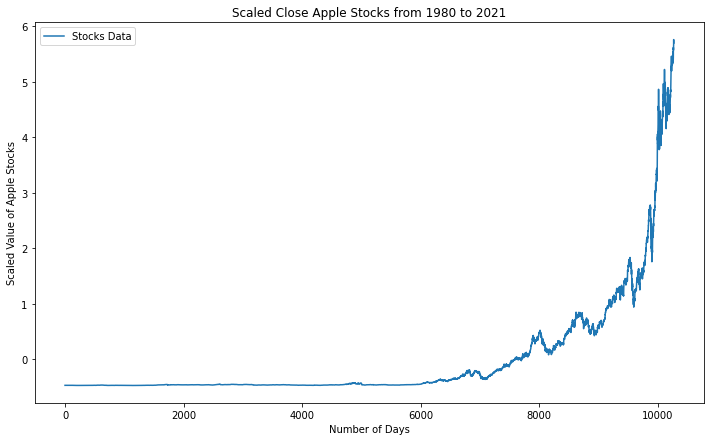

In [14]:
# Close Data
plt.figure(figsize=(12,7), frameon=False, facecolor='red', edgecolor='green')
plt.ylabel('Scaled Value of Apple Stocks')
plt.xlabel('Number of Days')
plt.title('Scaled Close Apple Stocks from 1980 to 2021')
plt.plot(scaled_close_stock, label='Stocks Data')
plt.legend()
plt.show()


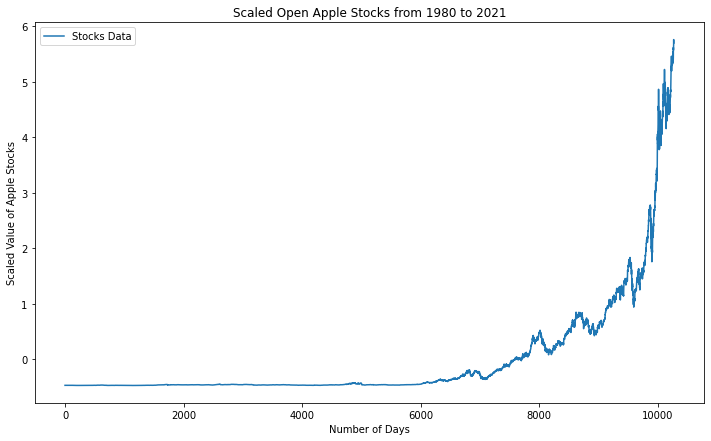

In [15]:
# Open Data
plt.figure(figsize=(12,7), frameon=False, facecolor='red', edgecolor='green')
plt.ylabel('Scaled Value of Apple Stocks')
plt.xlabel('Number of Days')
plt.title('Scaled Open Apple Stocks from 1980 to 2021')
plt.plot(scaled_close_stock, label='Stocks Data')
plt.legend()
plt.show()

In [16]:
#helper for windowing function
def windowing_helper(data, wind_size, X, y):
    i = 0
    while (i + wind_size) <= len(data) - 1:
        forX=i+wind_size
        fory=i+wind_size
        y.append(data[fory])
        X.append(data[i:forX])
        
        i =i+ 1
    return X, y

In [17]:

#function for labeling data and creating features from the data. It does that by windowing the data

def windowing(data, wind_size):
    X = []
    y = []

    X, y= windowing_helper(data, wind_size, X, y)

    assert len(X) ==  len(y)
    return X, y

In [18]:
X_close, Y_close = windowing(scaled_close_stock, 7)
X_open, Y_open = windowing(scaled_open_stock, 7)

Train/Test Split

In [19]:
# Close Data
X_trc  = np.array(X_close[:700])
Y_trc = np.array(Y_close[:700])

print("X_train_close_data: {}".format(X_trc.shape))
print("Y_train_close_data: {}".format(Y_trc.shape))

X_tsc = np.array(X_close[700:])
Y_tsc = np.array(Y_close[700:])

print("X_test_close_data: {}".format(X_tsc.shape))
print("Y_test_close_data: {}".format(Y_tsc.shape))



X_train_close_data: (700, 7, 1)
Y_train_close_data: (700, 1)
X_test_close_data: (9565, 7, 1)
Y_test_close_data: (9565, 1)


In [20]:
# Open Data
X_tro  = np.array(X_open[:700])
Y_tro = np.array(Y_open[:700])

print("X_train_open_data size: {}".format(X_tro.shape))
print("Y_train_open_data size: {}".format(Y_tro.shape))

X_tso = np.array(X_open[700:])
Y_tso = np.array(Y_open[700:])

print("X_test_open_data size: {}".format(X_tso.shape))
print("Y_test_open_data size: {}".format(Y_tso.shape))

X_train_open_data size: (700, 7, 1)
Y_train_open_data size: (700, 1)
X_test_open_data size: (9565, 7, 1)
Y_test_open_data size: (9565, 1)


# Data Exploration

Subplots

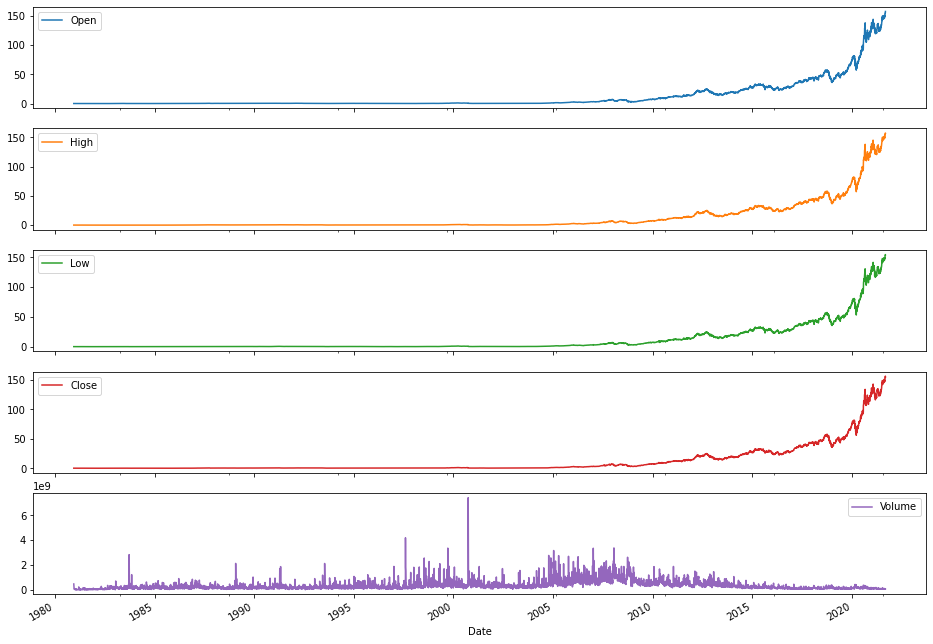

In [21]:
apple_stocks.plot(subplots=True, figsize=(16, 12))
plt.show()

Analysis on High, Low, Open and Close Values from 1980-2021

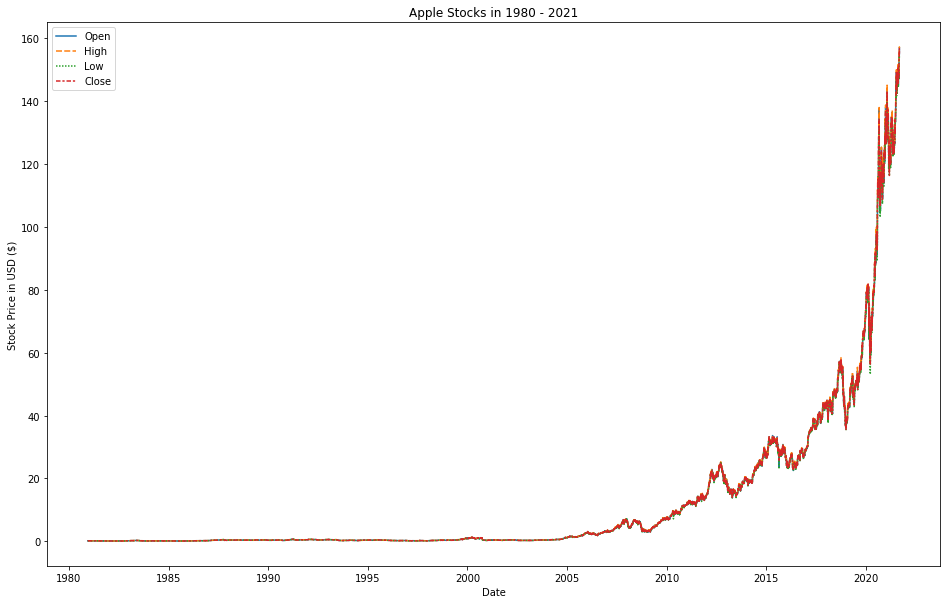

In [22]:
plt.figure(figsize=(16,10))
sns.lineplot(data=data.loc['1980-12-12':'2021-09-08'])
plt.title('Apple Stocks in 1980 - 2021')
plt.ylabel("Stock Price in USD ($)")
plt.show()

Analysis on Volume from 1980-2021

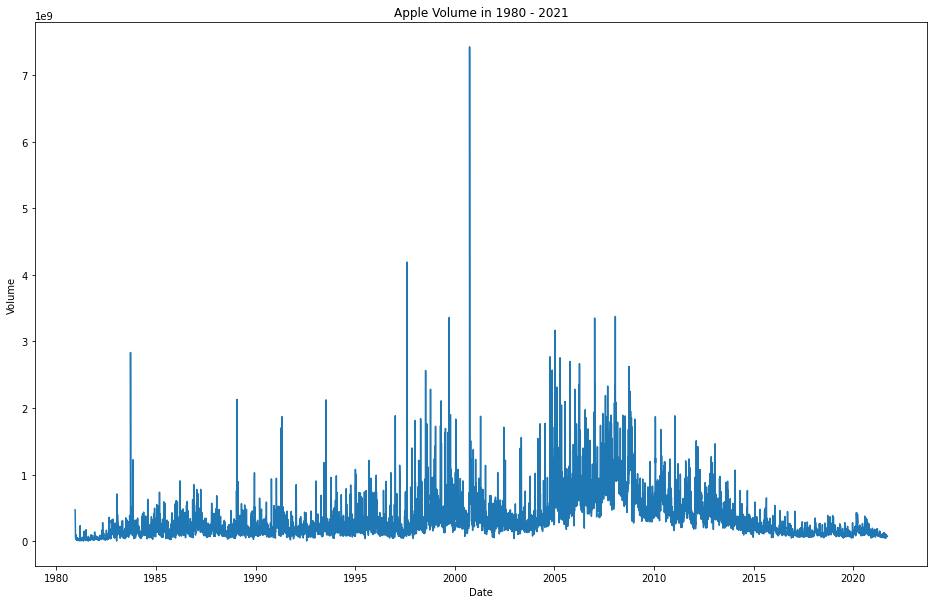

In [23]:
plt.figure(figsize=(16,10))
sns.lineplot(data=volume.loc['1980-12-12':'2021-09-08'])
plt.title('Apple Volume in 1980 - 2021')
plt.show()

Time Series Analysis on Open, Close and Volume Stock - Weighted Moving Average

In [24]:
# set up 

open_stock = apple_stocks[['Open']]
close_stock = apple_stocks[['Close']]
volume_stock = apple_stocks[['Volume']]

def plot_timeseries(tdf,a,b,col,title):
    plt.figure(figsize=(25,15))
    
    # lineplot for first data
    sns.lineplot(data=tdf,
                 label=a,
                 legend=False,)
    
    # lineplot for second data
    sns.lineplot(data=apple_stocks[col],
                 label=b,
                 legend=False,)
    plt.title(title)
    plt.legend()
    plt.show()

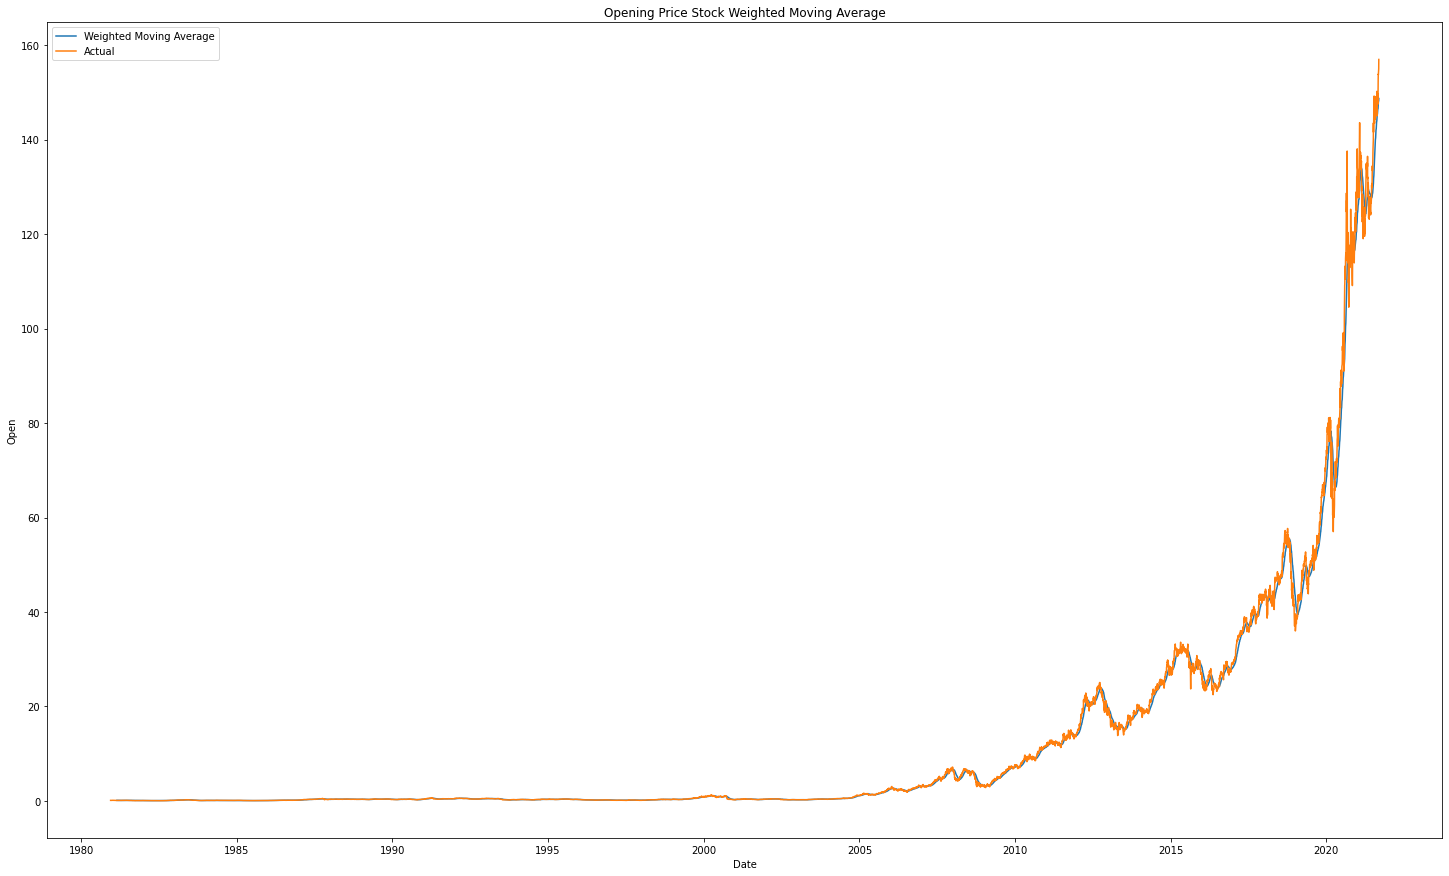

In [25]:
# Open Stock
weights = np.arange(1, 51)
open_s = apple_stocks['Open'].rolling(50).apply(lambda close: np.dot(close, weights)/weights.sum(), 
                                      raw=True)

# Plotting Data
plot_timeseries(open_s, 
                'Weighted Moving Average', 
                'Actual', 
                'Open', 
                'Opening Price Stock Weighted Moving Average') 

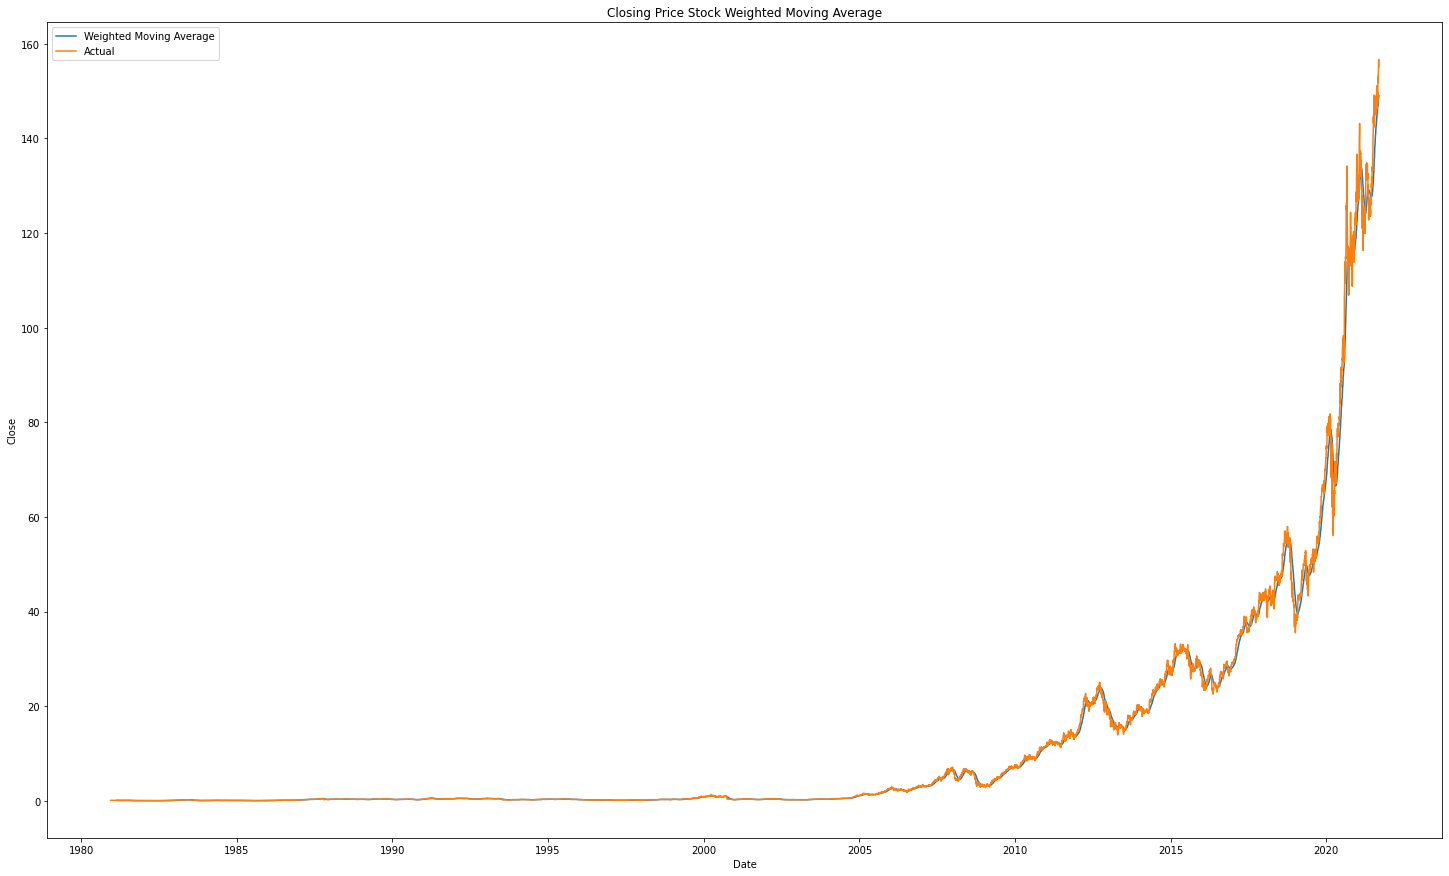

In [26]:
# Close Stock
weights = np.arange(1, 51)
close_s = apple_stocks['Close'].rolling(50).apply(lambda close: np.dot(close, weights)/weights.sum(), 
                                        raw=True)

# Plotting Data
plot_timeseries(close_s,
                'Weighted Moving Average',
                'Actual', 
                'Close', 
                'Closing Price Stock Weighted Moving Average') 

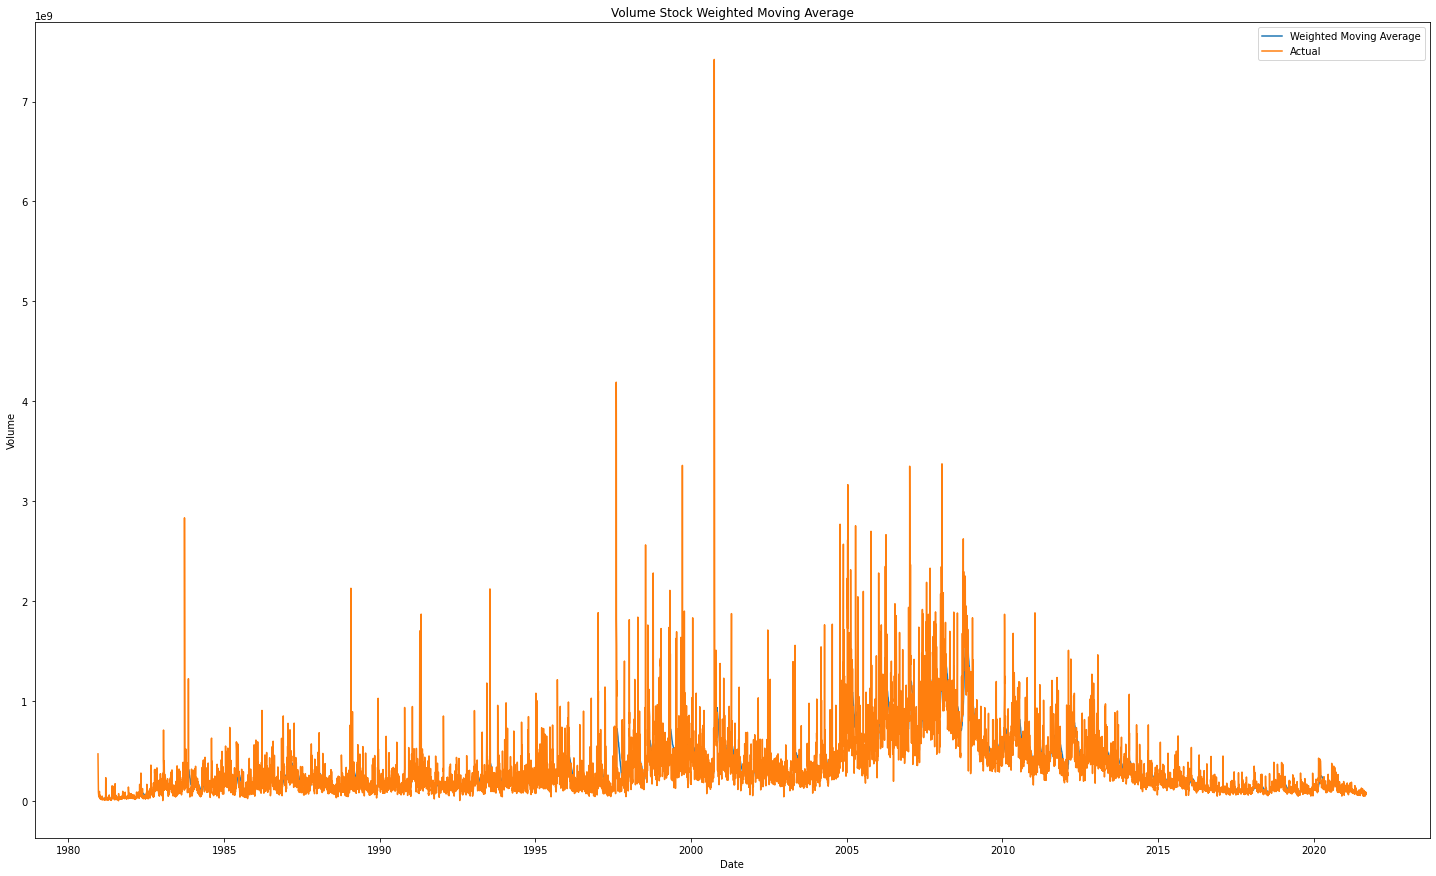

In [27]:
# Volume Stock
weights = np.arange(1, 51)
volume_s = apple_stocks['Volume'].rolling(50).apply(lambda close: np.dot(close, weights)/weights.sum(), 
                                          raw=True)

# Plotting Data
plot_timeseries(volume_s, 
                'Weighted Moving Average', 
                'Actual', 
                'Volume', 
                'Volume Stock Weighted Moving Average') 


# Network Definition

Set Desired Parameter

In [28]:
epochs = 5
alpha = 0.01 #learning rate

# prevent gradient from overflowing
margin_value = 4

# amount of days considered to predict next point in sequence
sizeOfWindow = 7

# value of windows of data passing at one run
sizeOfBatch = 7

# amount of units utilize in LSTM cell
unitsInHiddenLayer = 256

In [29]:
# placeholders
insertedValues = tf.placeholder(tf.float32, [sizeOfBatch, sizeOfWindow, 1])
outputTarget = tf.placeholder(tf.float32, [sizeOfBatch, 1])

# LSTM Weight Values

# forget gate weights
x1=tf.truncated_normal([1, unitsInHiddenLayer], stddev=0.05)
forget_gate_weights = tf.Variable(x1)
x2=tf.truncated_normal([unitsInHiddenLayer, unitsInHiddenLayer], stddev=0.05)
forget_hidden_weights = tf.Variable(x2)
x3=tf.zeros([unitsInHiddenLayer])
forgetBias = tf.Variable(x3)

# input gate weights
y1=tf.truncated_normal([1, unitsInHiddenLayer], stddev=0.05)
input_gate_weights = tf.Variable(y1)
y2=tf.truncated_normal([unitsInHiddenLayer, unitsInHiddenLayer], stddev=0.05)
input_hidden_weights = tf.Variable(y2)
y3=tf.zeros([unitsInHiddenLayer])
inputBias = tf.Variable(y3)

# output gate weights
z1=tf.truncated_normal([1, unitsInHiddenLayer], stddev=0.05)
output_gate_weights = tf.Variable(z1)
z2=tf.truncated_normal([unitsInHiddenLayer, unitsInHiddenLayer], stddev=0.05)
output_hidden_weights = tf.Variable(z2)
z3=tf.zeros([unitsInHiddenLayer])
outputbias = tf.Variable(z3)

# memory cell weights
ab1=tf.truncated_normal([1, unitsInHiddenLayer], stddev=0.05)
memory_cell_weights = tf.Variable(ab1)
ab2=tf.truncated_normal([unitsInHiddenLayer, unitsInHiddenLayer], stddev=0.05)
memory_cell_hidden_weights = tf.Variable(ab2)
ab3=tf.zeros([unitsInHiddenLayer])
bias_memory_cell = tf.Variable(ab3)

# output layer weights
bc1=tf.truncated_normal([unitsInHiddenLayer, 1], stddev=0.05)
weights_output = tf.Variable(bc1)
bc2=tf.zeros([1])
bias_output_layer = tf.Variable(bc2)

In [30]:
def callingCellHelper(input, output, state):
    # forgets unnecessary information
    a1=tf.matmul(input, forget_gate_weights)
    a2=tf.matmul(output, forget_hidden_weights)
    o1 = tf.sigmoid(a1 + a2 + forgetBias)

    # add/update new information
    b1=tf.matmul(input, input_gate_weights)
    b2=tf.matmul(output, input_hidden_weights)
    o2 = tf.sigmoid( b1 + b2 + inputBias)

    # pass updated information
    c1=tf.matmul(input, output_gate_weights)
    c2=tf.matmul(output, output_hidden_weights)
    o3 = tf.sigmoid(c1 + c2 + outputbias)
    
    d1=tf.matmul(input, memory_cell_weights)
    d2=tf.matmul(output, memory_cell_hidden_weights)
    o4 = tf.tanh(d1 + d2 + bias_memory_cell)

    return o1, o2, o3,  o4


def callingCell(input, output, state):
    forget_gate_layer, input_gate_layer, output_gate_layer,  memory_cell= callingCellHelper(input, output, state)
    m1=state * forget_gate_layer
    m2=input_gate_layer * memory_cell
    state = m1 + m2
    
    output = output_gate_layer * tf.tanh(state)
    return state, output

In [31]:
def produceNextOutput(batch_state, batch_output, x):
    # input to LSTM to produce next output
    #for y in range(sizeOfWindow):
    y=0
    while y < sizeOfWindow:
        smth=tf.reshape(insertedValues[x][y], (-1, 1))
        batch_state, batch_output = callingCell(smth, batch_state, batch_output)
        y+=1
        
    return batch_state, batch_output

# iterates per window in the batch size

def produceNext(outputValues):
    x=0
    while x<sizeOfBatch: 
        batch_state = np.zeros([1, unitsInHiddenLayer], dtype=np.float32) 
        batch_output = np.zeros([1, unitsInHiddenLayer], dtype=np.float32)

        batch_state, batch_output = produceNextOutput(batch_state, batch_output, x)

        # used to get prediction
        smth1=tf.matmul(batch_output, weights_output)
        outputValues.append(smth1 + bias_output_layer)
        x+=1

    return outputValues

outputValues = []
outputValues=produceNext(outputValues)

In [32]:
def calculateLossF(losses):
    len1=len(outputValues)
    x=0
    while x<len1:
        val1=tf.reshape(outputTarget[x],(-1, 1))
        mul1=tf.losses.mean_squared_error(val1, outputValues[x])
        losses.append(mul1)
        x+=1
    loss = tf.reduce_mean(losses)

    return losses, loss


losses = []

losses, loss=calculateLossF(losses)

In [33]:
# calculate the gradient loss 
calc_grad_loss = tf.gradients(loss, tf.trainable_variables())

# rescales list of tensors for total norm of vector so it does not go over threshold
val_clip, _ = tf.clip_by_global_norm(calc_grad_loss, margin_value)

# update network weights in training data using Adam optimization algorithm instead of stochastic gradient descent 
adam_opt = tf.train.AdamOptimizer(alpha)

# re-zip gradient and value back into an an iterable of tuple and passed to optimizer method
tr_opt = adam_opt.apply_gradients(zip(calc_grad_loss, tf.trainable_variables()))

# Network Training

In [34]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [35]:
# Close Prices: epochs and loss
for x in range(epochs):
    y = 0
    trained_scc = []
    lossInEpoch = []
    while(y + sizeOfBatch) <= len(X_trc):
        bx1=y+sizeOfBatch
        y_trc_batch = Y_trc[y:bx1]
        bx2=y+sizeOfBatch
        X_trc_batch = X_trc[y:bx2]

        o, c, _ = session.run([outputValues, loss, tr_opt], feed_dict={insertedValues:X_trc_batch, outputTarget:y_trc_batch})

        lossInEpoch.append(c)
        trained_scc.append(o)
        y =y+ sizeOfBatch

    if (x % 30) == 0:
        print('Printing Epoch Number: {}/{}'.format(x, epochs))
        print('Printing Loss: {}'.format(np.mean(lossInEpoch))) 

Printing Epoch Number: 0/5
Printing Loss: 0.16005563735961914


In [36]:
train_cl = []
tests_cl0 = []
tests_cl1 = []
test_cl2 = []

def close_train(trained_scc):
  x = 0
  y = 0
  lenX = len(trained_scc)
  while x < lenX:
    lenY = len(trained_scc[x])
    while y < lenY:
      train_cl.append(trained_scc[x][y][0])
      y+=1
    x+=1
  return train_cl


def testing_cl0(batch_size_value, outputs, X_tsc):
  i = 0
  while i+batch_size_value <= len(X_tsc):
    o = session.run([outputs], feed_dict={inputs:X_tsc[i:i+batch_size_value]})
    i += batch_size_value
    tests_cl0.append(o)
  return tests_cl0


def testing_cl1(test_cl1):
  x = 0
  y = 0
  lenX = len(testing_cl0(test_cl0))
  while x < lenX:
    lenY = len(testing_cl0(test_cl0)[x])
    while y < lenY:
      train_cl.append(testing_cl0(test_cl0)[x][y][0])
      y+=1
    x+=1
  return test_cl1


def testing_cl2(test_cl1):
  for i in range(749):
    if i >= 701:
        test_cl2.append(testing_cl1(tests_cl1)[i-701])
    else:
        test_cl2.append(None)
  return test_cl2

In [37]:
# Open Prices: epochs and loss
for x in range(epochs):
    
    lossInEpoch = []
    trained_sco = []
    y = 0

    while(y + sizeOfBatch) <= len(X_tro):
        ax1=y+sizeOfBatch
        y_tro_batch = Y_tro[y:ax1]
        ax2=y+sizeOfBatch
        X_tro_batch = X_tro[y:ax2]

        o, c, _ = session.run([outputValues, loss, tr_opt], feed_dict={insertedValues:X_tro_batch, outputTarget:y_tro_batch})

        lossInEpoch.append(c)
        trained_sco.append(o)
        y =y+ sizeOfBatch
    if (x % 30) == 0:
        print('Printing Epoch Number: {}/{}'.format(x, epochs))
        print('Printing Loss: {}'.format(np.mean(lossInEpoch)))

Printing Epoch Number: 0/5
Printing Loss: 1.2489346090660547e-06


In [38]:
train_op =[]
tests_op0 = []
tests_op1 = []
test_op2 = []

def close_train(trained_sco):
  x = 0
  y = 0
  lenX = len(trained_sco)
  while x < lenX:
    lenY = len(trained_sco[x])
    while y < lenY:
      train_op.append(trained_sco[x][y][0])
      y+=1
    x+=1
  return trained_sco


def testing_cl0(batch_size_value, outputs, X_tso):
  i = 0
  while i+batch_size_value <= len(X_tso):
    o = session.run([outputs], feed_dict={inputs:X_tso[i:i+batch_size_value]})
    i += batch_size_value
    tests_op0.append(o)
  return tests_op0


def testing_cl1(test_op1):
  x = 0
  y = 0
  lenX = len(testing_op0(test_op0))
  while x < lenX:
    lenY = len(testing_op0(test_op0)[x])
    while y < lenY:
      train_op.append(testing_op0(test_op0)[x][y][0])
      y+=1
    x+=1
  return test_op1


def testing_cl2(test_op1):
  for i in range(749):
    if i >= 701:
        test_op2.append(testing_op1(tests_op1)[i-701])
    else:
        test_op2.append(None)
  return test_op2

# Network Prediction Visualization

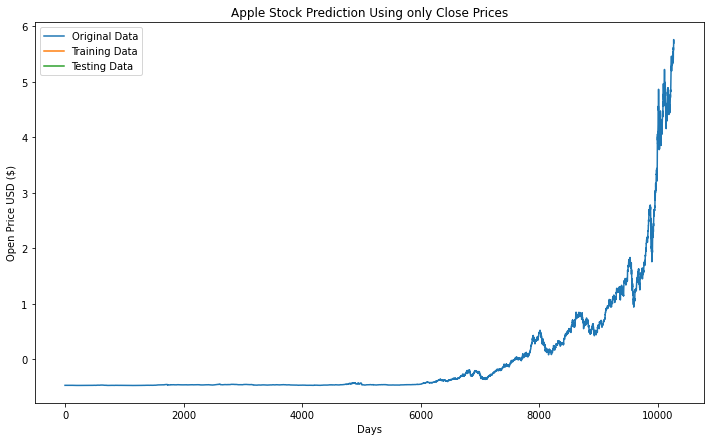

In [39]:
plt.figure(figsize=(12 , 7))
plt.plot(scaled_close_stock, label='Original Data')
plt.plot(train_cl, label='Training Data')
plt.plot(test_cl2, label='Testing Data')
plt.title("Apple Stock Prediction Using only Close Prices")
plt.xlabel("Days")
plt.ylabel("Open Price USD ($)")
plt.legend()
plt.show()

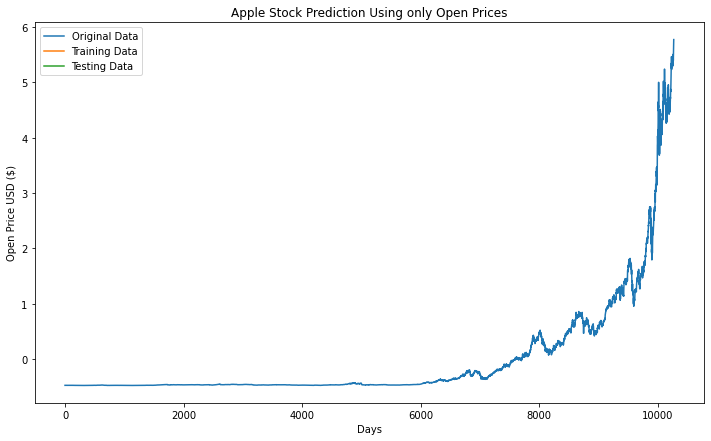

In [40]:
plt.figure(figsize=(12 , 7))
plt.plot(scaled_open_stock, label='Original Data')
plt.plot(train_op, label='Training Data')
plt.plot(test_op2, label='Testing Data')
plt.title("Apple Stock Prediction Using only Open Prices")
plt.xlabel("Days")
plt.ylabel("Open Price USD ($)")
plt.legend()
plt.show()

Dataset: https://www.kaggle.com/meetnagadia/apple-stock-price-from-19802021?select=AAPL.csv